## Question 2

The variables that we chose to work with to predict mortality and ife expectancy are calories, proteins, carbs, and fats. We decided to use these variables because of how broad macro nutrients are, and that they are all linked to each other (ex, look at protein rather than type of fish eaten, covers broader spectrum, pizza would link carbs and fat together, etc). We felt that macro nutrients would give an overarching view of the a diet, rather than narrowing it down too closely to specific foods, hence our choice. 

In [ ]:
import pandas as pd
mdf = pd.read_csv('linked_mortality_file_1999_2000.csv') 
print( mdf.head() )
gdf = pd.read_sas("DEMO.xpt", format="xport") 
print( gdf.head() )
df = gdf.merge(mdf, on="SEQN", how="inner") 


food = pd.read_sas("DRXTOT.xpt", format="xport") 
print(food.head())
X = df.merge(food, on="SEQN", how="left") 
X.head()


   SEQN  ELIGSTAT  MORTSTAT  UCOD_LEADING  DIABETES  HYPERTEN  PERMTH_INT  \
0     1         2       NaN           NaN       NaN       NaN         NaN   
1     2         1       1.0           6.0       0.0       0.0       177.0   
2     3         2       NaN           NaN       NaN       NaN         NaN   
3     4         2       NaN           NaN       NaN       NaN         NaN   
4     5         1       0.0           NaN       NaN       NaN       244.0   

   PERMTH_EXM  
0         NaN  
1       177.0  
2         NaN  
3         NaN  
4       244.0  
   SEQN  SDDSRVYR  RIDSTATR  RIDEXMON  RIAGENDR  RIDAGEYR  RIDAGEMN  RIDAGEEX  \
0   1.0       1.0       2.0       2.0       2.0       2.0      29.0      31.0   
1   2.0       1.0       2.0       2.0       1.0      77.0     926.0     926.0   
2   3.0       1.0       2.0       1.0       2.0      10.0     125.0     126.0   
3   4.0       1.0       2.0       2.0       1.0       1.0      22.0      23.0   
4   5.0       1.0       2.0       2.

,SEQN,SDDSRVYR,RIDSTATR,RIDEXMON,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDAGEEX,RIDRETH1,RIDRETH2,...,DRQ370QQ,DRD370R,DRQ370RQ,DRD370S,DRQ370SQ,DRD370T,DRQ370TQ,DRD370U,DRQ370UQ,DRD370V
0,1.0,1.0,2.0,2.0,2.0,2.0,29.0,31.0,4.0,2.0,...,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0
1,2.0,1.0,2.0,2.0,1.0,77.0,926.0,926.0,3.0,1.0,...,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0
2,3.0,1.0,2.0,1.0,2.0,10.0,125.0,126.0,3.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,1.0,2.0,2.0,1.0,1.0,22.0,23.0,4.0,2.0,...,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0
4,5.0,1.0,2.0,2.0,1.0,49.0,597.0,597.0,3.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
X_interesting = X.loc[:,['ELIGSTAT', 'MORTSTAT', 'PERMTH_INT', 'RIDAGEEX', 'DRXTKCAL','DRXTPROT', 'DRXTCARB', 'DRXTTFAT'] ]
X_interesting.head()


,ELIGSTAT,MORTSTAT,PERMTH_INT,RIDAGEEX,DRXTKCAL,DRXTPROT,DRXTCARB,DRXTTFAT
0,2,NaN,NaN,31.0,1358.88,31.96,250.36,27.24
1,1,1.0,177.0,926.0,2463.00,123.16,350.37,71.95
2,2,NaN,NaN,126.0,1517.69,40.19,233.63,49.94
3,2,NaN,NaN,23.0,1474.93,56.16,191.03,56.20
4,1,0.0,244.0,597.0,2658.14,97.13,253.98,114.52


In [3]:
# describe table
X_interesting.describe()

,ELIGSTAT,MORTSTAT,PERMTH_INT,RIDAGEEX,DRXTKCAL,DRXTPROT,DRXTCARB,DRXTTFAT
count,9965.000000,5445.000000,5445.000000,9.141000e+03,8.725000e+03,8.725000e+03,8.725000e+03,8.725000e+03
mean,1.453889,0.307622,202.314601,3.453502e+02,1.975533e+03,7.115863e+01,2.586785e+02,7.201394e+01
std,0.498499,0.461551,67.137767,2.835316e+02,9.900975e+02,4.062756e+01,1.362553e+02,4.284108e+01
min,1.000000,0.000000,0.000000,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79
25%,1.000000,0.000000,194.000000,1.290000e+02,1.304850e+03,4.402000e+01,1.653400e+02,4.195000e+01
50%,1.000000,0.000000,235.000000,2.280000e+02,1.797800e+03,6.389000e+01,2.351400e+02,6.363000e+01
75%,2.000000,1.000000,242.000000,5.500000e+02,2.440150e+03,8.938000e+01,3.237300e+02,9.188000e+01
max,3.000000,1.000000,250.000000,1.019000e+03,9.656670e+03,4.610200e+02,1.513960e+03,4.282300e+02


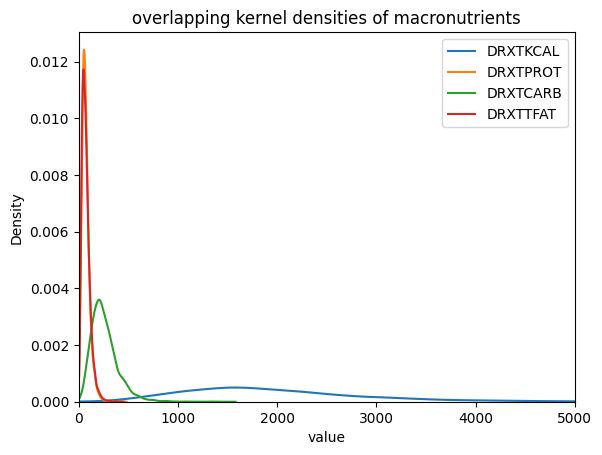

In [6]:
# Kernel density plot

import seaborn as sns
import matplotlib.pyplot as plt

nutrients = ['DRXTKCAL','DRXTPROT','DRXTCARB','DRXTTFAT']

plt.figure()

for var in nutrients:
    sns.kdeplot(X_interesting[var], label=var, fill=False)
plt.xlim(0, 5000)

plt.legend()
plt.title('overlapping kernel densities of macronutrients')
plt.xlabel('value')
plt.show()


In this density plot, we can see that variables protein and fat have a similar distribution (peaking early and high), while calories in total has the lowest, flattest distribution. 
Shows - 
Protein & fat: Most people eat roughly similar amounts = tight clustering.
Calories: People vary a lot more → some eat way more = spread out curve.

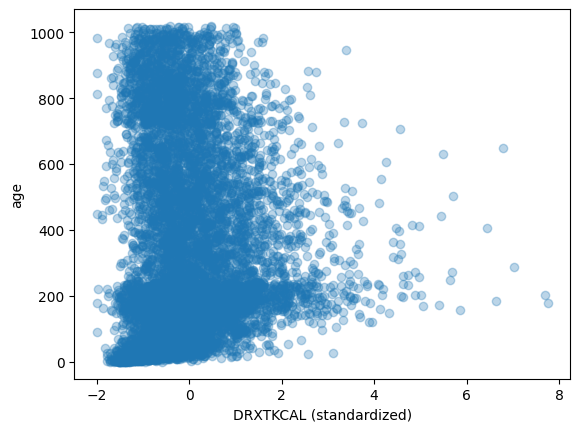

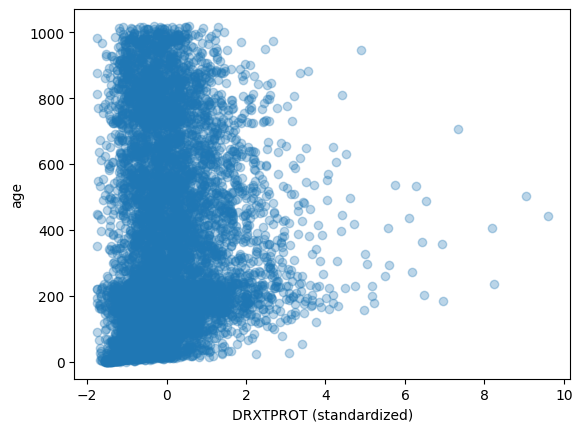

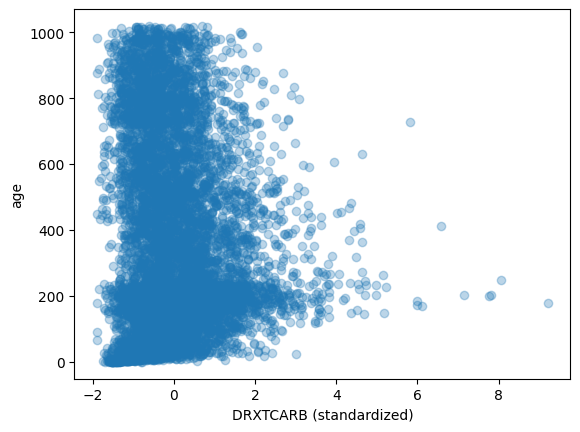

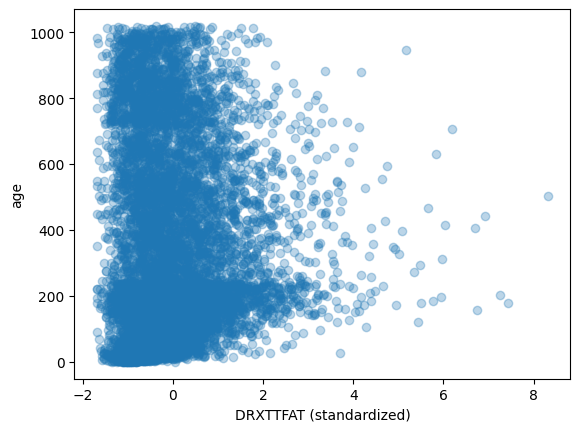

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled = scaler.fit_transform(X_interesting[nutrients])
scaled_df = pd.DataFrame(scaled, columns=nutrients)

for var in nutrients:
    plt.figure()
    plt.scatter(scaled_df[var], X_interesting['RIDAGEEX'], alpha=0.3)
    plt.xlabel(var + " (standardized)")
    plt.ylabel('age')
    plt.show()


These scatter plots show that...

- There is little linear relationship between age and individual macronutrients
- Intake varies widely at all ages
- Age alone doesn’t strongly determine macro intake

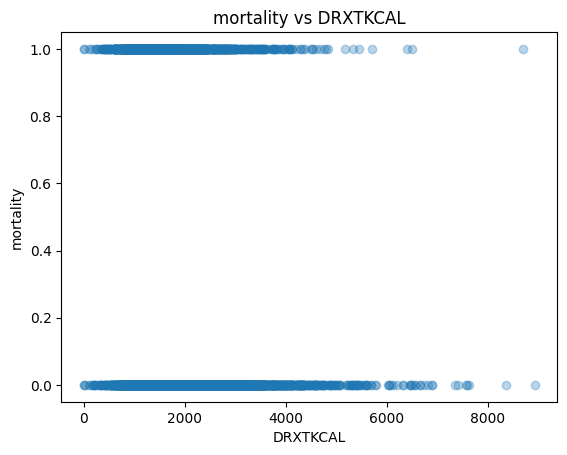

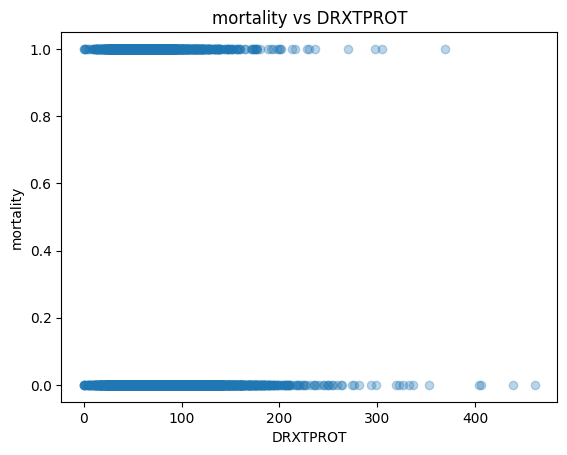

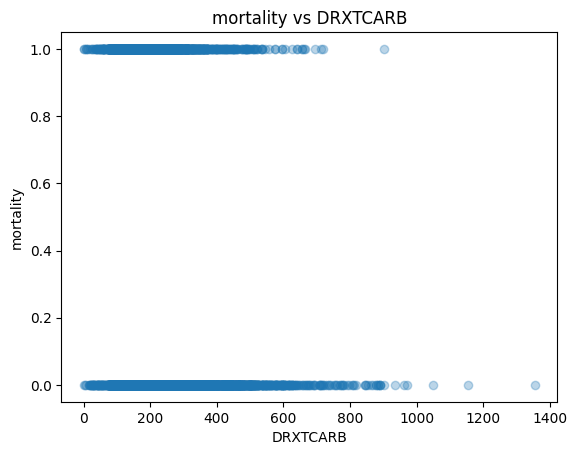

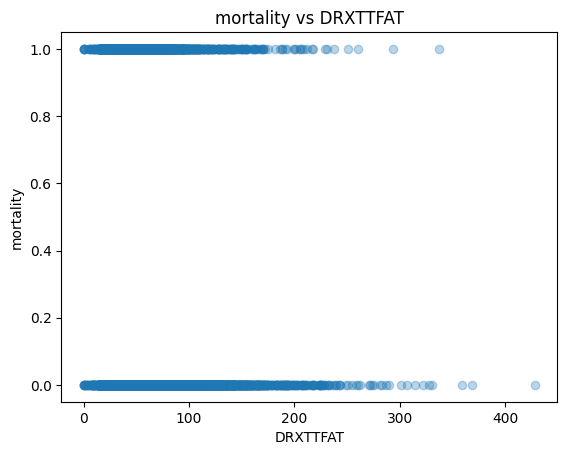

In [8]:
for var in nutrients:
    plt.figure()
    plt.scatter(X_interesting[var], X_interesting['MORTSTAT'], alpha=0.3)
    plt.xlabel(var)
    plt.ylabel('mortality')
    plt.title(f'mortality vs {var}')
    plt.show()


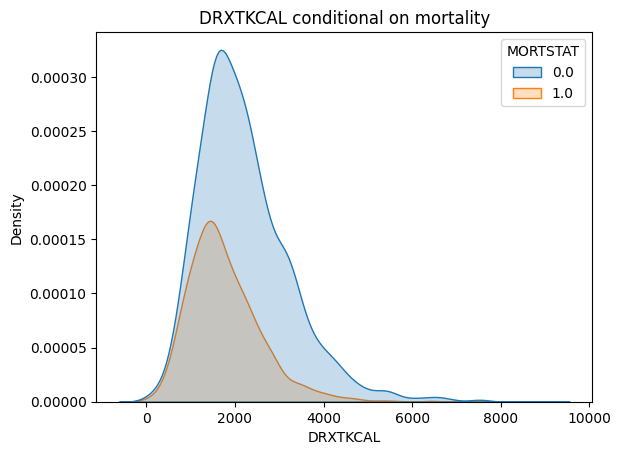

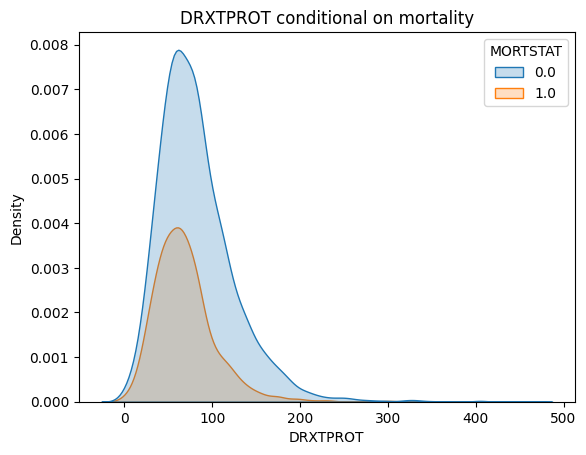

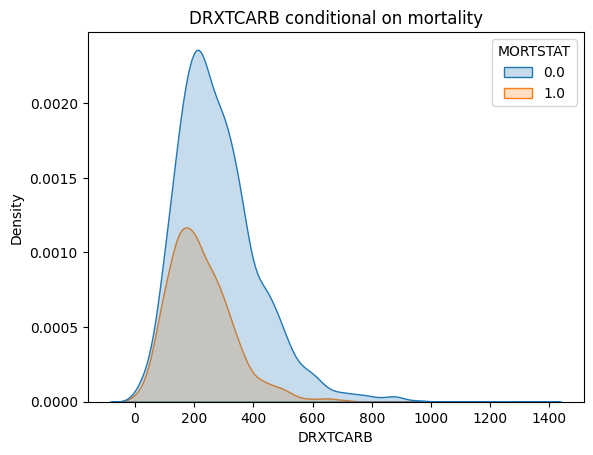

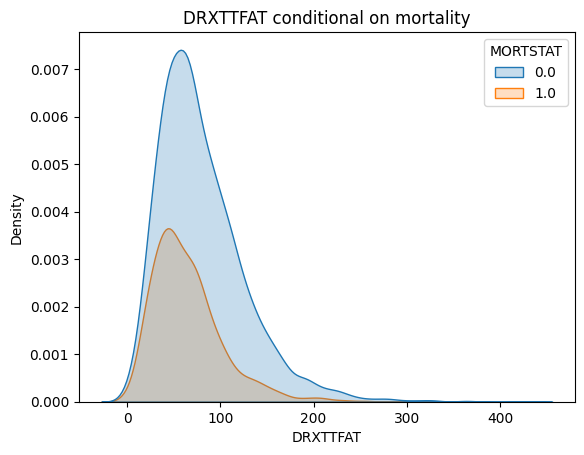

In [9]:
for var in nutrients:
    plt.figure()
    sns.kdeplot(data=X_interesting, x=var, hue='MORTSTAT', fill=True)
    plt.title(f'{var} conditional on mortality')
    plt.show()


# Question 2 Continued...

